In [3]:
# Decision Surface

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

SEED = 42
data = load_iris()
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


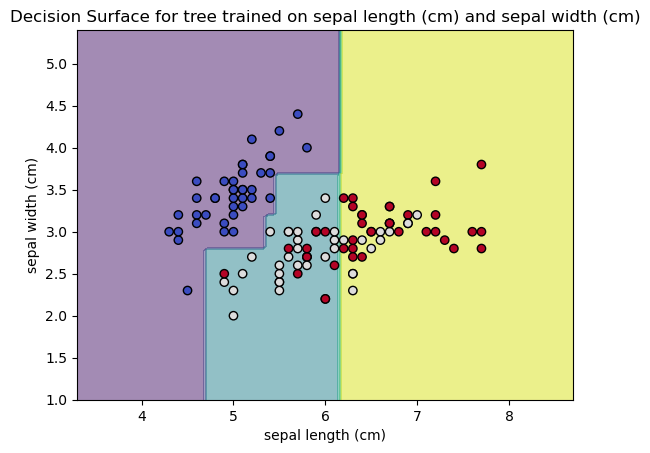

In [8]:
X_train_cols = X_train[:, :2]
classifier = DecisionTreeClassifier(max_depth=4, random_state=SEED).fit(X_train_cols, y_train)

disp = DecisionBoundaryDisplay.from_estimator(classifier, X_train_cols, response_method="predict",
 xlabel=data.feature_names[0], ylabel=data.feature_names[1], alpha=0.5)

disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.coolwarm, edgecolors='k')
plt.title(f"Decision Surface for tree trained on {data.feature_names[0]} and {data.feature_names[1]}")
plt.show()



In [9]:
from itertools import combinations
import numpy as np
comb=combinations(np.arange(0,4),2)
unique_combinations=set(comb)

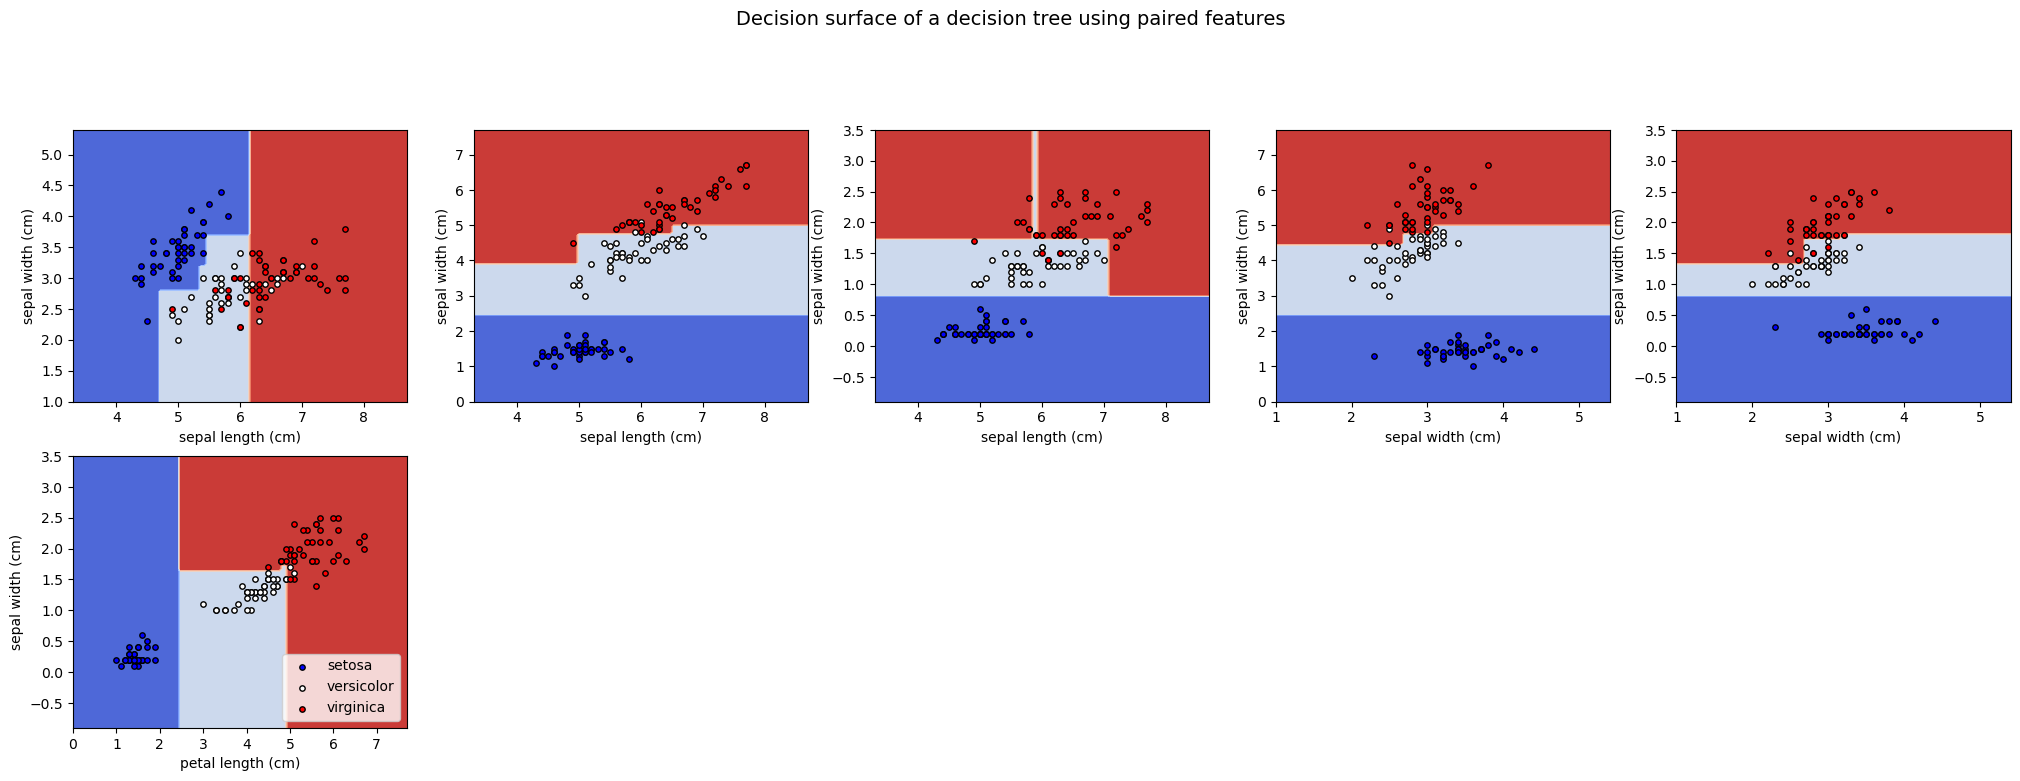

In [13]:
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr"
plot_step = 0.02
plt.figure(figsize=(25, 12))
for pair_idx, pair in enumerate(sorted(unique_combinations)):
    X_train_cols = X_train[:, pair]
    classifier = DecisionTreeClassifier(max_depth=4, random_state=SEED).fit(X_train_cols, y_train)
    ax = plt.subplot(3, 5, pair_idx + 1)

    DecisionBoundaryDisplay.from_estimator(classifier, X_train_cols, cmap=color_palette, response_method="predict", 
                                           ax=ax, xlabel=data.feature_names[pair[0]], ylabel=data.feature_names[1])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train_cols[idx, 0], X_train_cols[idx, 1], c=color,
                label=data.target_names[i], cmap=color_palette,edgecolors='black', s=15)
plt.suptitle("Decision surface of a decision tree using paired features",fontsize=14)
plt.legend(loc='lower right')
